# 분류 모델
- 분류(classification): 카테고리 구분을 예측하는 것
- 컨퓨전 매트릭스와 분류의 성능 지표인 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수 이해
- 오분류가 발생한 샘플 찾기
- 내부 점수 보기 (decision_function)
- 분류 경계값 (threshold)를 바꾸어 정밀도와 리콜을 다르게 선택하는 방법

## 코랩에 한글 폰트 설치
- (주의!) 아래 셀을 실행 후에, 런타임 - 런타임 다시 시작을 수행해야 한다
 - 코랩은 리눅스 머신이면 한글이 미리 설치되어 있지 않다
 - 한글이 이미 설치된 PC에서는 아래 셀을 실행할 필요없다

In [1]:
# colab을 사용하는 경우만 이 셀을 실행하며, 실행 후 런타임 - 런타임 다시 시작 을 수행해야 한다
# 한글이 설치된 PC에서는 이 셀을 실행할 필요 없음
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
!apt -qq -y install fonts-nanum
fm._rebuild() 
plt.rc('font', family='NanumBarunGothic') 

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



## 한글 사용 설정
- 그림에 한글이 보이게 하기 위해서 한글 사용을 설정한다.
- 운영체제마다 명령이 다르다

In [2]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 13})

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# 컨퓨전 매트릭스
- 분류의 성능을 평가하려면 먼저 컨퓨전 매트릭스를 이해해야 한다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.44.12.png?raw=1" width=450 align='left'>



##  이진 분류 예시
 - 총 100명을 진단하고 9명을 양성이라고 예측했으나 실제로 양성은 6명, 음성은 3명
 - 91명을 음성이라고 예측했으나 실제로 음성은 87명, 양성은 4명
 
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.49.05.png?raw=1" width=450 align='left'>

## 분류 기본 성능 평가
- Accuracy (정확도): 전체 맞춘 비율 (TP+TP) / (TP+FP+FN+FP)
- Precision: positive로 예측한 것 중 실제로 맞는 비율, TP / (TP+FP) 
- Recall (Sensitivity):  전체 positive 중 모델이 찾아낸 비율, TP / (TP+FN)
- f1-score: Precision과 Recall의 조화 평균 (2 x  Precision x Recall) /  (Precision + Recall)

- Accuracy (정확도): 93/100
- Precision: 6/9
- Recall (Sensitivity):  6/10

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.56.47.png?raw=1" width = 530 align='left'>

### (참고) 조화평균
- f-1 점수는 정밀도와 리콜의 조화평균(harmonic average)이다

- 점수들이 조화로울수록 (서로 차이가 작을수록) 조화평균 점수가 높다

- a, b의 산술 평균, $c = $${(a + b)}\over {2}$
- a, b의 조화 평균 $c$, ${1}\over{c}$ =  ($1\over{a}$+${1}\over{b}$) $/ 2$   
> $c = $ ${2ab}\over{(a+b)}$

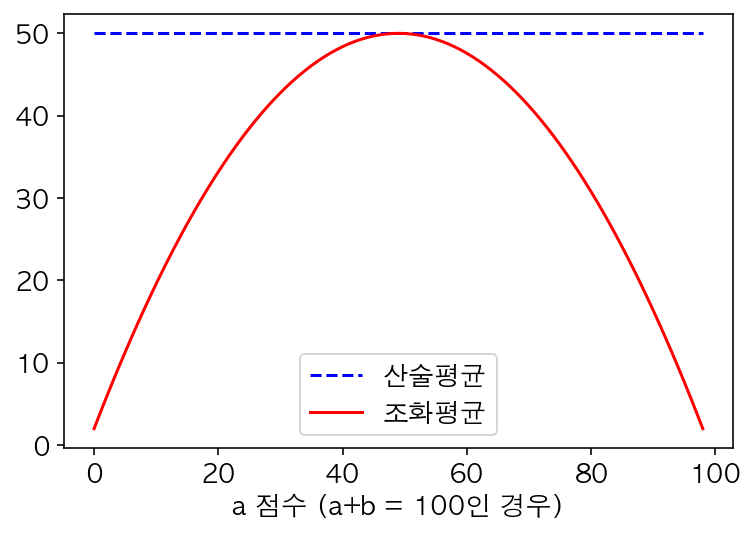

In [5]:
## 산술평균과 조화평균 비교하기 (a+b = 100 인 경우)

plt.figure(figsize=(6,4))
a = np.linspace(1,99,99)
b = 100 - a
arithmetic_avg = (a+b) / 2
harmonic_avg = 2*a*b / (a + b)
plt.xlabel('a 점수 (a+b = 100인 경우)')
plt.plot(arithmetic_avg, 'b--', label='산술평균')
plt.plot(harmonic_avg, 'r-',label='조화평균')
plt.legend()

## 10명의 환자를 검진한 결과 예

In [6]:
## 10명 환자에 대한 암진단 점수를 랜덤하게 배정했다

# 일정한 랜덤 패턴 발생
np.random.seed(19)
scores_raw = np.random.randint(30,99,10)

# 환자 번호(ID)와 암진단 점수 보기 
df = pd.DataFrame({"점수":scores_raw})
df.index.name='ID'
df.T

ID,0,1,2,3,4,5,6,7,8,9
점수,70,49,82,61,96,86,52,64,35,40


In [7]:
## 암환자를 판정하기 위해서 점수순으로 소팅 (인덱스도 같이 소팅된다)

df = df.sort_values(['점수'], ascending=False)
df.T

ID,4,5,2,0,7,3,6,1,9,8
점수,96,86,82,70,64,61,52,49,40,35


In [8]:
## 암으로 진단하는 기준 점수(threshold)를 65점이라고 가정한다

threshold =  50

# 암진단(positive)를 0으로 인코딩했다 (~ 사용함)
pred_cancer = ~(df["점수"] > threshold)
df["진단"] = pred_cancer.astype(int)

# 실제로 암 발생 결과를 임의로 지정 (암 발생이면 0)
df['실제암발생'] = np.array([0,0,1,0,1,0,1,0,1,1])
df.T

ID,4,5,2,0,7,3,6,1,9,8
점수,96,86,82,70,64,61,52,49,40,35
진단,0,0,0,0,0,0,0,1,1,1
실제암발생,0,0,1,0,1,0,1,0,1,1


# 분류 평가

In [9]:
## 혼돈 매트릭스와 분류 평가 점수 보기

def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

y_pred = df['진단'].values
y_test = df['실제암발생'].values
score_sorted = df['점수'].values

show_clf_result(y_test, y_pred)

[[4 1]
 [3 2]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



## 암진단 경계값을 하나씩 낮추면서 P-R 보기

In [10]:
## 암진단 경계값을 하나씩 낮추면서 암진단 예측하기 (y_pred 만들기)

y_pred_list = []

# 경계값을 1~10으로 하나씩 낮춘다
for thres in range(1,11):
    tmp = [1]*10
    for i in range(thres):
        tmp[i] = 0
    y_pred_list.append(tmp)

y_pred_list

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [11]:
## 예측치와 실제값을 주고 혼돈 매트릭스와 평가 점수 보기

# 정밀도, 리콜 계산 결과를 담을 리스트
res = []

for y_pred in y_pred_list:
    res.append((precision_score(y_test, y_pred, pos_label=0).round(2),
         recall_score(y_test, y_pred, pos_label=0)))

PR = np.array(res)
PR

array([[1.  , 0.2 ],
       [1.  , 0.4 ],
       [0.67, 0.4 ],
       [0.75, 0.6 ],
       [0.6 , 0.6 ],
       [0.67, 0.8 ],
       [0.57, 0.8 ],
       [0.62, 1.  ],
       [0.56, 1.  ],
       [0.5 , 1.  ]])

In [12]:
## 전체 결과 보기

df_PR = df.copy()
df_PR[['P(정밀도)','R(재현율)']] = PR
df_PR.drop(['진단'], axis=1, inplace=True)
df_PR

,점수,실제암발생,P(정밀도),R(재현율)
ID,,,,
4,96,0,1.00,0.2
5,86,0,1.00,0.4
2,82,1,0.67,0.4
0,70,0,0.75,0.6
7,64,1,0.60,0.6
3,61,0,0.67,0.8
6,52,1,0.57,0.8
1,49,0,0.62,1.0
9,40,1,0.56,1.0


- Accuracy (정확도): 전체 맞춘 비율
- Precision: positive로 예측한 것중 실제로 맞는 비율, TP / ( TP + FP ) 
- Recall (Sensitivity):  전체 positive 중 모델이 찾아낸 비율, TP / (TP+FN)
- f1-score: Precision과 Recall의 조화 평균 (2 x  Precision x Recall ) /  (Precision + Recall)

(0.0, 1.05)

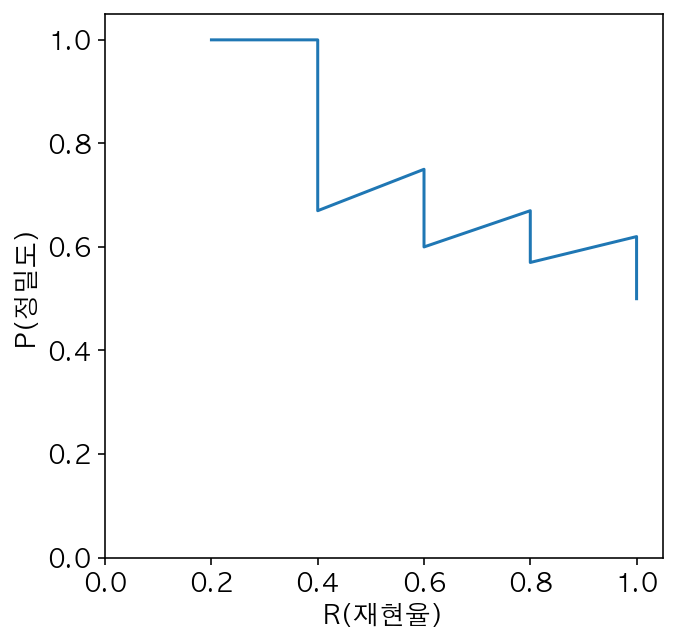

In [13]:
## Precision-Recall 커브 그리기 (x축이 R(재현율)이다)

plt.plot(df_PR['R(재현율)'], df_PR['P(정밀도)'])
plt.xlabel('R(재현율)')
plt.ylabel('P(정밀도)')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

(0.0, 1.05)

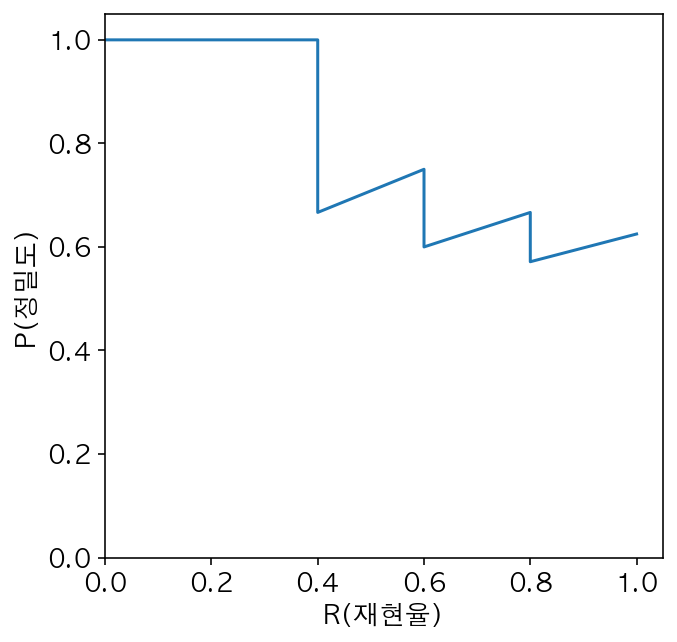

In [14]:
## P-R 커브를 그려주는 함수 사용

from sklearn.metrics import precision_recall_curve

prec,rcl,_ = precision_recall_curve(y_test,score_sorted,pos_label=0)
plt.plot(rcl, prec)
plt.xlabel('R(재현율)')
plt.ylabel('P(정밀도)')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

## ROC

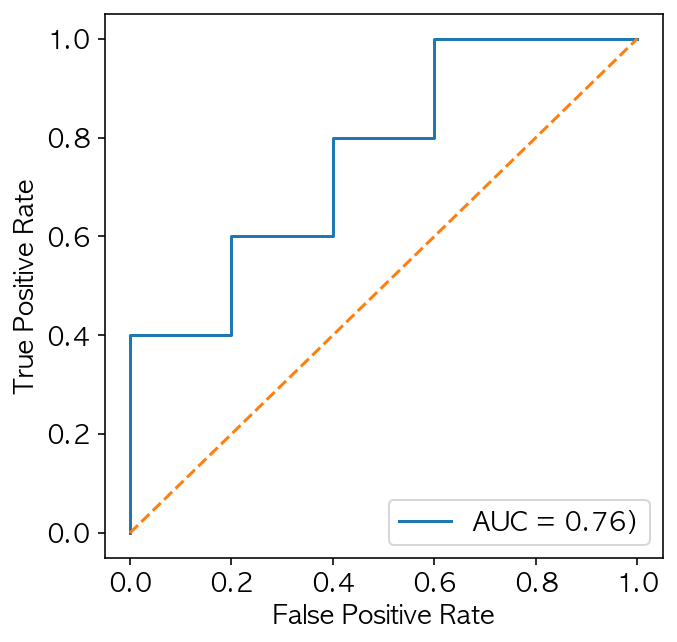

In [15]:
## ROC 커브 그리기 (roc_curve 함수 사용)

fpr,tpr,_ = roc_curve(y_test,score_sorted,pos_label=0)

# AUC(면적) 계산하기
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

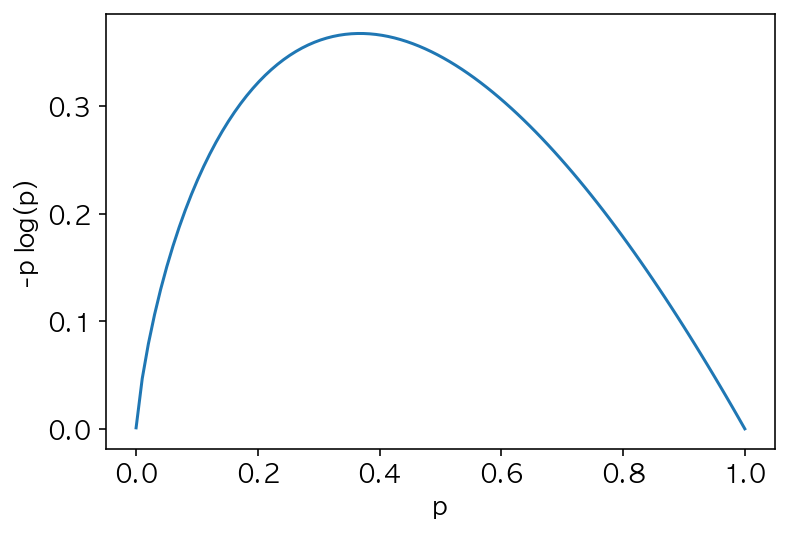

In [16]:
# 확률 p로 발생하는 사건의 엔트포피

plt.figure(figsize=(6,4))
xs = np.linspace(0.0001, 1, 100)
plt.plot(xs, -xs*np.log(xs))
plt.xlabel("p")
plt.ylabel("-p log(p)")
plt.show()

- support는 분석에 사용된 샘플수
- macro 평균은 성능평가 점수들을 0, 1 케이스에 대해서 1:1로 산술평균을 구한 것
- weighted 평균은 샘플의 갯수를 고려하여 0, 1 케이스에 대해서 가중평균을 구한 것

## 데이터 읽기

(1000, 3)


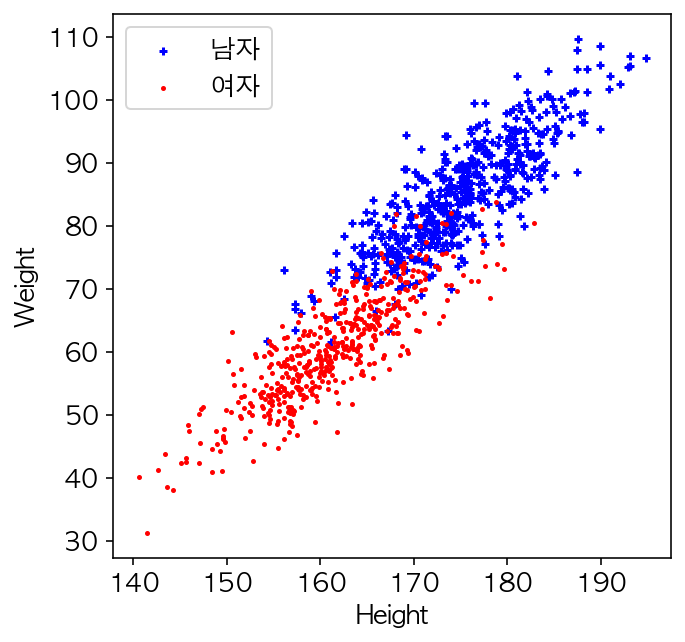

In [17]:
## 남녀 키, 몸무게 데이터 읽기

data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height500.csv")
print(data.shape)
data.Gender = data.Gender.map({'Male':0, 'Female':1})
df = data.copy()

# 남성(0)은 파란색(+), 여성(1)은 붉은색(.)
plt.scatter(df.Height[df.Gender==0],df.Weight[df.Gender==0],
            marker='+', s=13, color='b', label='남자')
plt.scatter(df.Height[df.Gender==1],df.Weight[df.Gender==1],
            marker='.', s=9, color='r', label='여자')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

## 데이터 나누기
- 키과 몸무게를 보고 성별를 예측하려고 함
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [18]:
## 키와 몸무게를 보고 성별을 구분하는 분류 문제

X = df[["Height", "Weight"]]
y = df.Gender

# 스케일링
X_sc = X.copy()
scaler = StandardScaler()
X_sc.loc[:,:] = scaler.fit_transform(X_sc)

# 훈련 데이터, 검증 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=9)

# 선형 분류 모델
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련

# 결과 보기
print('정확도: ',model.score(X_test, y_test)) # (3) 평가 (정확도)
a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
print('a1, a2, b =', np.array((a1, a2, b)).round(4))

정확도:  0.904
a1, a2, b = [ 0.7909 -7.2942  1.0945]


In [19]:
## 혼돈 매트릭스와 분류 평가 점수 보기

y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[101  18]
 [  6 125]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       119
           1       0.87      0.95      0.91       131

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250



## 이진 분류 결정 경계
- decision boundary
- 하나의 변수만 사용하는 경우 결정 경계: $x_{1} > b$  
- 두 개의 변수를 사용하는 경우 결정 경계: (점수) $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=500 align='left'>


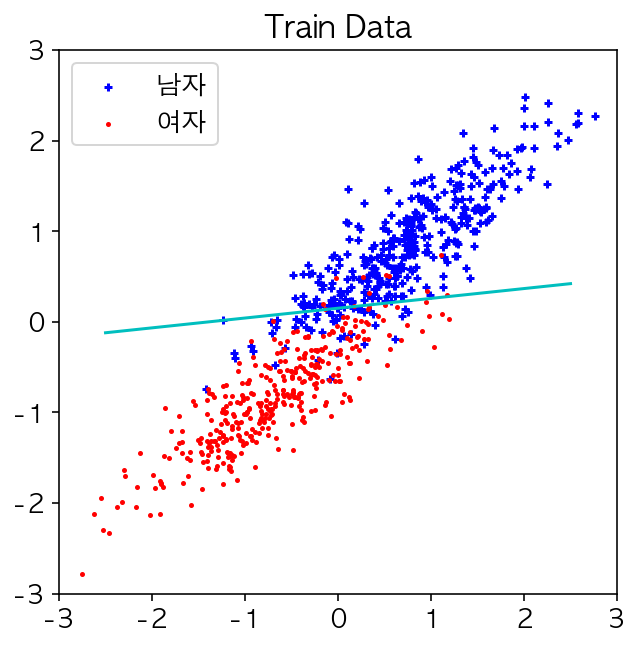

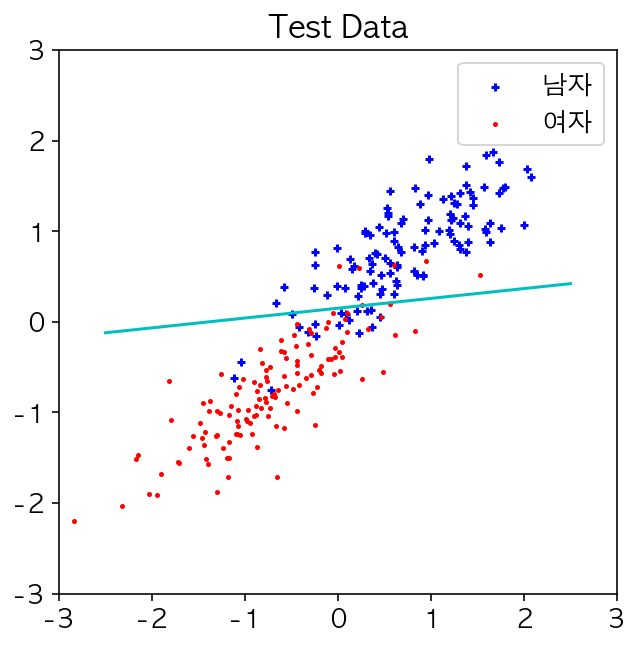

In [20]:
## 훈련 데이터 결정 경계와 테스트 데이터에 적용한 결과

xs = np.array((-2.5, 2.5))
ys = -(a1/a2)*xs - b/a2

# 훈련 데이터 결정 경계 그리기
plt.title('Train Data')
plt.plot(xs,ys, c='c')
plt.scatter(X_train.Height[y_train==0],X_train.Weight[y_train==0],
            marker='+', s=13, color='b', label='남자')
plt.scatter(X_train.Height[y_train==1],X_train.Weight[y_train==1],
            marker='.', s=9, color='r', label='여자')
plt.ylim([-3,3])
plt.xlim([-3,3])
plt.legend()
plt.show()

# 테스트 데이터에 적용한 결과
plt.title('Test Data')
plt.plot(xs,ys, c='c')
plt.scatter(X_test.Height[y_test==0],X_test.Weight[y_test==0],
            marker='+', s=13, color='b', label='남자')
plt.scatter(X_test.Height[y_test==1],X_test.Weight[y_test==1],
            marker='.', s=9, color='r', label='여자')
plt.ylim([-3,3])
plt.xlim([-3,3])
plt.legend()

# 결과 보기


## 잘못 분류된 샘플 찾기
- 힌트: 잘못 분류된 샘플의 인덱스를 먼저 구한다
- 해당 샘플들만 산포도에 그린다

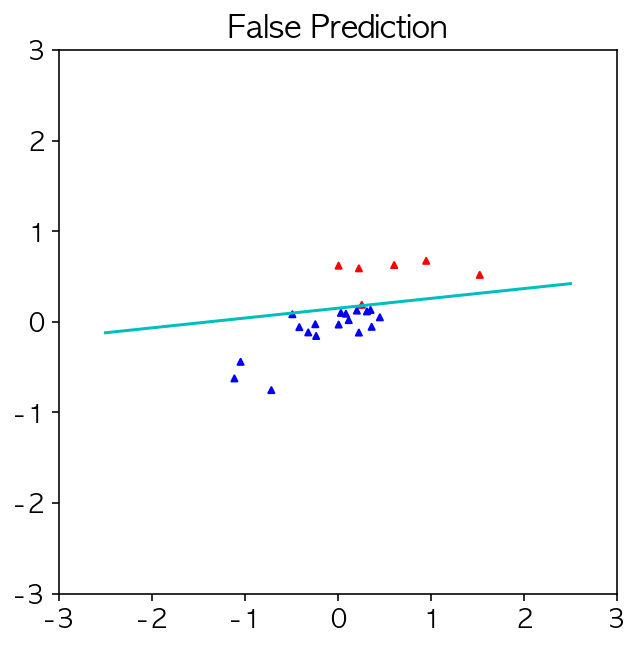

In [21]:
## 남여가 잘못 분류된 샘플 찾기

# 오류가 발생한 샘플의 인덱스를 찾고 오류 데이터프레임을 만든다
index_false = X_test[y_pred != y_test].index
df_false = pd.concat((X_test,y_test),axis=1).loc[index_false]

# 오류 샘플을 그래프에 표시한다
plt.title('False Prediction')
xs = np.array((-2.5, 2.5))
ys = -(a1/a2)*xs - b/a2
plt.plot(xs,ys, c='c')

plt.scatter(df_false.Height,df_false.Weight, 
            c=df_false.Gender, s=9, cmap='bwr', marker='^')

plt.ylim([-3,3])
plt.xlim([-3,3])
plt.show()

In [22]:
## 오류가 발생한 샘플 보기

df_false[:5]

,Height,Weight,Gender
496,-1.047874,-0.441888,0
603,1.523990,0.517816,1
65,-0.235143,-0.156678,0
148,0.006778,-0.030417,0
916,0.948371,0.672907,1


## 분류 점수

- 분류를 수행하기 위해서 내부적으로 계산하는 점수(score)
> score: $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     
- 점수를 제공하는 모델: 선형모델, SVM
 - 각 샘플별 점수는 decision_function()으로 얻는다
- 확률을 사용하는 모델: 트리계열, 랜덤포레스트, 부스팅, 로지스틱회귀, 신경망
 - 각 샘플별 분류 확률은 predict_proba()으로 얻는다

In [23]:
## 분류를 수행하기 위해서 내부적으로 계산한 점수를 본다

# 선형 모델은 가중합을 점수로 계산한다
score = model.decision_function(X_test) 
print('내부 결정 점수의 최소값, 최대값 : ',score.min().round(3), score.max().round(3))

df_s = X_test.copy()
df_s["Gender"] = y_test
df_s["score"] = score
df_s.sort_values('score')[:5]

내부 결정 점수의 최소값, 최대값 :  -11.266 14.869


,Height,Weight,Gender,score
271,1.663005,1.874902,0,-11.266033
369,0.979992,1.798816,0,-11.251269
77,1.590537,1.845597,0,-11.109591
193,1.735750,1.763697,0,-10.397341
445,1.377775,1.715436,0,-10.328452


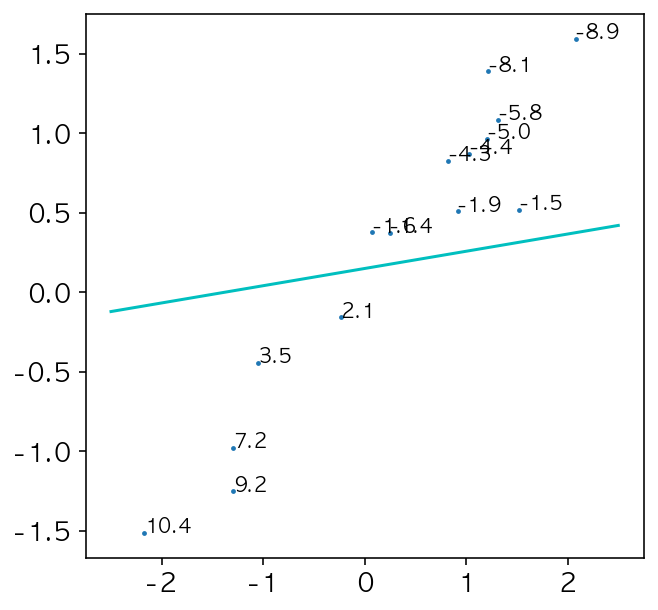

In [24]:
# 15개의 테스트 샘플의 점수만 보겠다

N = 15
xs = np.array((-2.5, 2.5))
ys = -(a1/a2)*xs - b/a2
plt.plot(xs,ys, c='c')

plt.scatter(df_s[:N].Height,df_s[:N].Weight, s=2)

for i in range(N):
    plt.text(df_s[:N].Height.iloc[i],df_s[:N].Weight.iloc[i], 
             df_s[:N].score.values.round(1).astype(str)[i],
             fontsize=10)

# 분류 경계값 바꾸기

- 머신러닝 모델은 기본적으로 f1 점수가 가장 큰 곳을 찾으며 이를 만족하는 점수(threshold)가 0이다.

## 0.92보다 높은 높은 리콜을 갖는 모델 사용하기

In [25]:
## 높은 정밀도를 갖는 예측 모델을 만들려면 경계값을 높인다

y_pred_high_precision = score > 3
show_clf_result(y_test, y_pred_high_precision)

[[116   3]
 [ 27 104]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89       119
           1       0.97      0.79      0.87       131

    accuracy                           0.88       250
   macro avg       0.89      0.88      0.88       250
weighted avg       0.90      0.88      0.88       250



In [26]:
## 높은 재현율을 갖는 예측 모델을 만들려면 경계값을 낮춘다

y_pred_high_recall = score > -3
show_clf_result(y_test, y_pred_high_recall)

[[ 76  43]
 [  3 128]]
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       119
           1       0.75      0.98      0.85       131

    accuracy                           0.82       250
   macro avg       0.86      0.81      0.81       250
weighted avg       0.85      0.82      0.81       250



## 경계값을 높은순으로 바꾸면서 정밀도-리콜 계산하기
- 경계값을 높은값에서 낮은 값으로 조금씩 바꾸면서 정밀도, 리콜의 변화를 그래프로 그린다

<AxesSubplot:xlabel='threshold'>

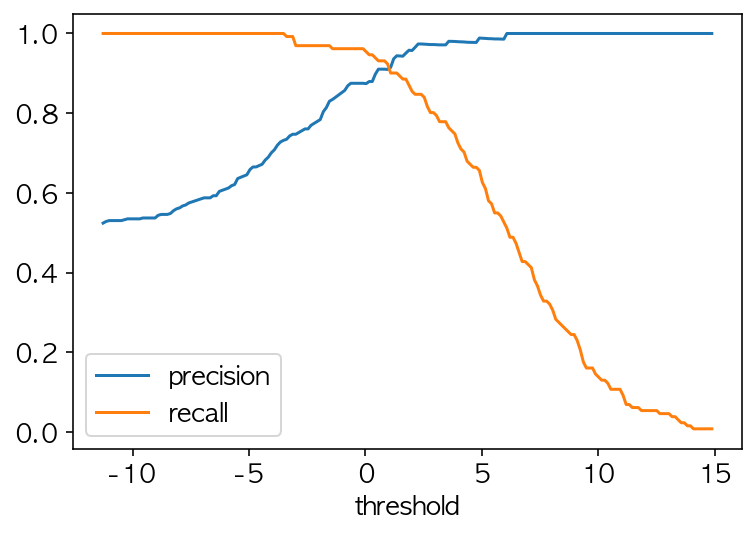

In [27]:
## 경계값을 조금씩 낮추면서 정밀도-리콜(P-R) 커브 그리기

# 실험에 사용한 경계값 (200 단계를 사용하겠다)
threshold_range = np.linspace(score.max(), score.min(), 200)

# 실험 결과 (경계값, 정밀도, 재현율)를 차례로 저장한다
result = []
for thres in list(threshold_range):
    y_pred_i = score >= thres
    result.append((thres, precision_score(y_test, y_pred_i), 
                   recall_score(y_test, y_pred_i)))

# 실험 결과 그리기
plt.rcParams['figure.figsize'] = (6,4)

df_r = pd.DataFrame(result, columns=['threshold','precision', 'recall'])
df_r.set_index('threshold').plot()

Text(0, 0.5, 'precision')

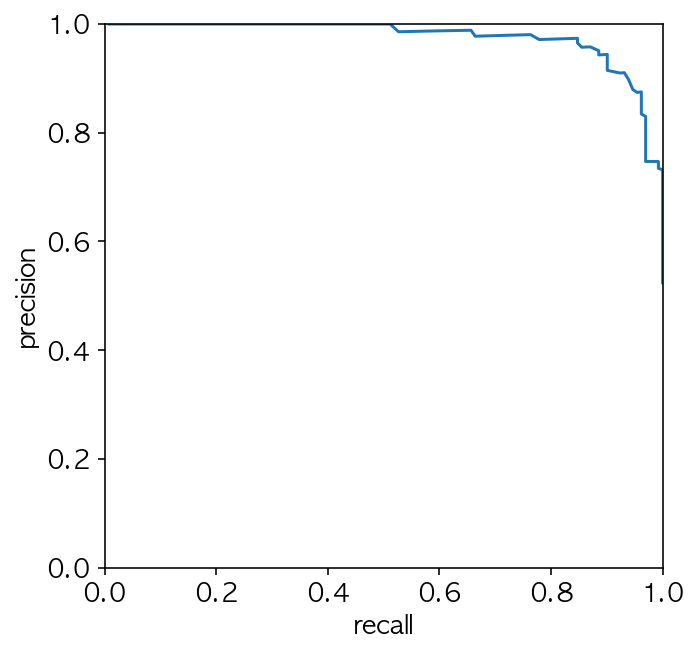

In [28]:
## P-R 곡선 그리기

plt.figure(figsize=(5,5))

plt.plot(df_r.recall, df_r.precision)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("recall")
plt.ylabel("precision")

Text(0, 0.5, 'precision')

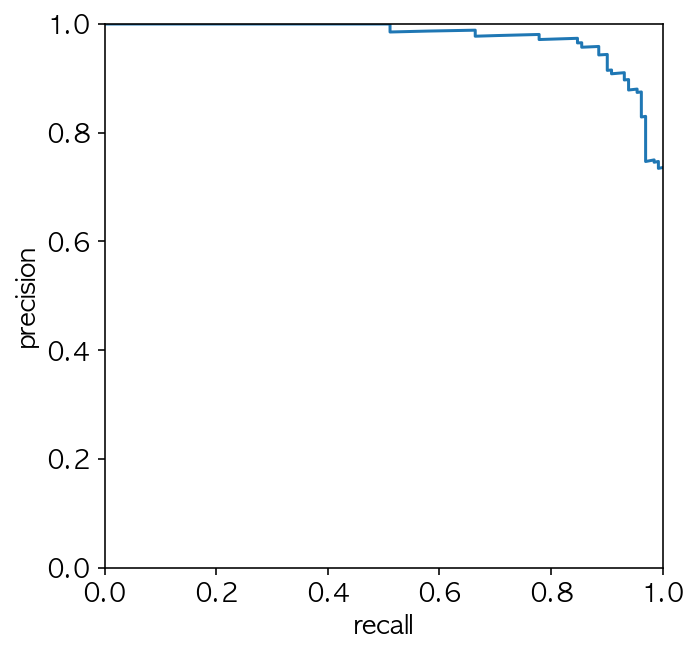

In [29]:
plt.figure(figsize=(5,5))

prec,rcl,_ = precision_recall_curve(y_test,score)
plt.plot(rcl, prec)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("recall")
plt.ylabel("precision")

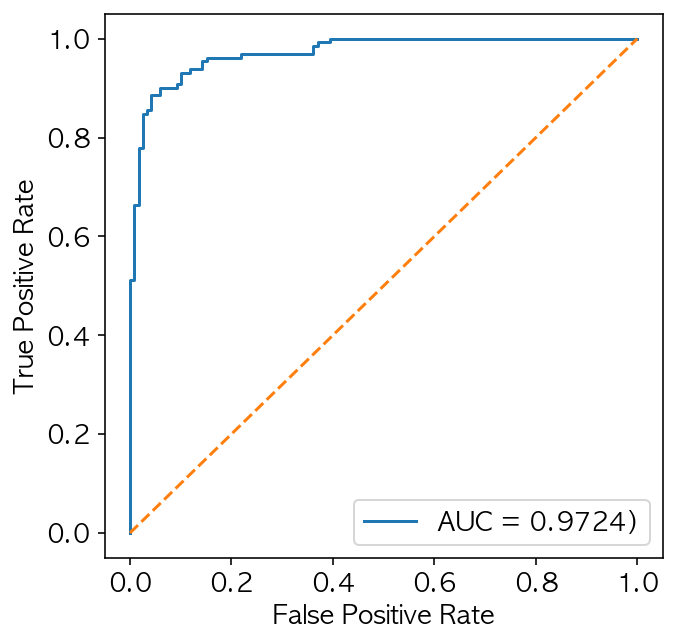

In [30]:
## ROC 커브 그리기 (roc_curve 함수 사용)

fpr,tpr,_ = roc_curve(y_test,score)

# AUC(면적) 계산하기
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")